In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#import csv in dataframe
df=pd.read_csv('C:/Users/manis/Downloads/advertising.csv')

In [52]:
#view dataframe
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [53]:
#view shape

df.shape
#dataframe has 200 records

(200, 4)

In [54]:
#check missing values
df.info()
#there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [55]:
df.describe()
#there does not seems to be outliers as values are not changing drastically

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


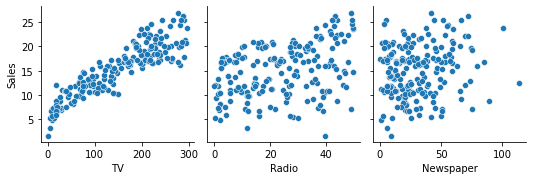

In [56]:
#plot graphs to indicate if there are linear relations
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=df)
#pair plot indictaes good linear relation between TV and sales

<AxesSubplot:>

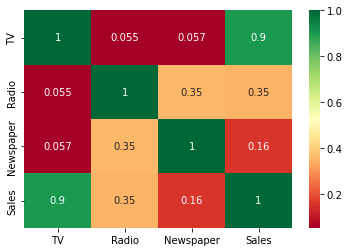

In [57]:
#plot heatmap
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
#heatmap also suggest good correlation between TV and sales

In [58]:
#Define dependent and independent varaiables
X=df['TV']
y=df['Sales']

In [59]:
#divide data into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [60]:
print(X_train.shape)
print(y_train.shape)

(140,)
(140,)


In [61]:
print(X_test.shape)
print(y_test.shape)

(60,)
(60,)


In [62]:
#Build model
import statsmodels.api as sm
#add constant to train variable. Statsmodel does not add constant by default and of not added then model passes origin
X_train_sm=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_sm).fit()
print(model.params)

const    6.948683
TV       0.054546
dtype: float64


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.52e-52
Time:                        22:57:53   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [ ]:
#In above summary , p values are less than 0.05, hence coefficients are signnificant
#Prob(F-statistic) is close to 0, hence model is significant
#R2 is 0.816, hence 81 percent of variance is explained by model

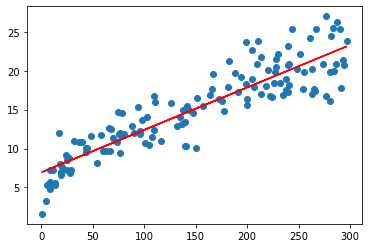

In [64]:
#plot model
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train_sm),'r')

In [65]:
#validate error
residue=y_train-model.predict(X_train_sm)

<AxesSubplot:ylabel='Count'>

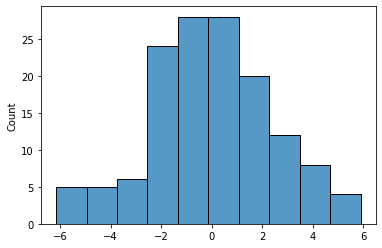

In [66]:
sns.histplot(residue)

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

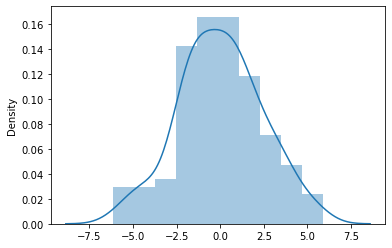

In [67]:
sns.distplot(residue)
#residue is normally distributed with mean at 0

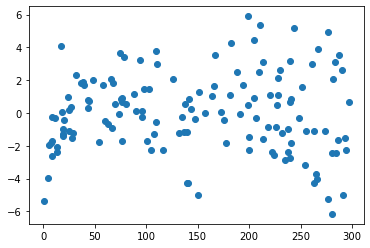

In [68]:
#plot scatter plot
plt.scatter(X_train,residue)
#There is no pattern hence error term seems to be independent
#however variance in error term does not seem to be constant

In [69]:
#evaluate test model
X_test_sm=sm.add_constant(X_test)
y_test_predicted=model.predict(X_test_sm)

C:\Users\manis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


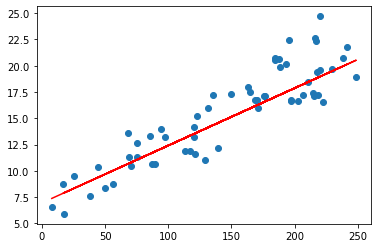

In [70]:
#plot test 
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_predicted,'r')

In [71]:
residue_test=y_test-y_test_predicted

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

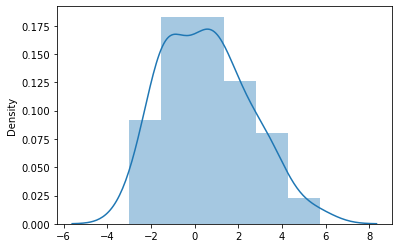

In [72]:
sns.distplot(residue_test)

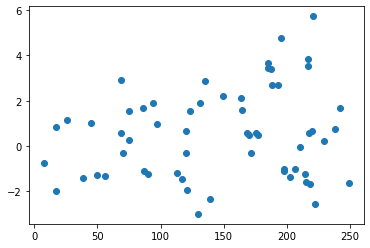

In [73]:
plt.scatter(X_test,residue_test)


In [74]:
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_test_predicted)
print(test_score)
train_score=r2_score(y_train,model.predict(X_train_sm))
print(train_score)

0.7921031601245658
0.8157933136480389


In [ ]:
#since difference in r2 score of train and test is with in 5% hence model can successfully explain around 61% of variance